In [30]:
import pandas as pd
from textblob import TextBlob


In [15]:
data = pd.read_csv('twitter_training.csv')
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [21]:
data.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [22]:
df = pd.DataFrame(data)

In [24]:
column_names = ["ID", "Game", "Sentiment", "Text"]
df.columns = column_names

In [25]:
df.head()

,ID,Game,Sentiment,Text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [26]:
df['Sentiment'] = df['Sentiment'].replace('Irrelevant','Neutral')

In [45]:
sentiment_counts = df['Sentiment'].value_counts().sort_index()

sentiment_labels = ['Negative', 'Neutral', 'Positive']
sentiment_colors = ['red', 'grey', 'green']


In [31]:
pip install plotly


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

     ---------------------------------------- 15.6/15.6 MB 6.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
import plotly.graph_objects as go



In [42]:
chart =go.Pie(labels=sentiment_counts.index, 
                             values=sentiment_counts.values,
                             textinfo='percent+value+label',
                             marker_colors=sentiment_colors,
                             textposition='auto',
                             hole=.3)
fig = go.Figure(data=[chart])

In [43]:
fig.update_layout(
    title_text='Sentiment Distribution',
    template='plotly_white',
    xaxis=dict(
        title='Sources',
    ),
    yaxis=dict(
        title='Number of Posts in Twitter',
    )
)

fig.update_traces(marker_line_color='black', 
                  marker_line_width=2.5, 
                  opacity=1.0)
 
fig.show()

<Axes: xlabel='Sentiment'>

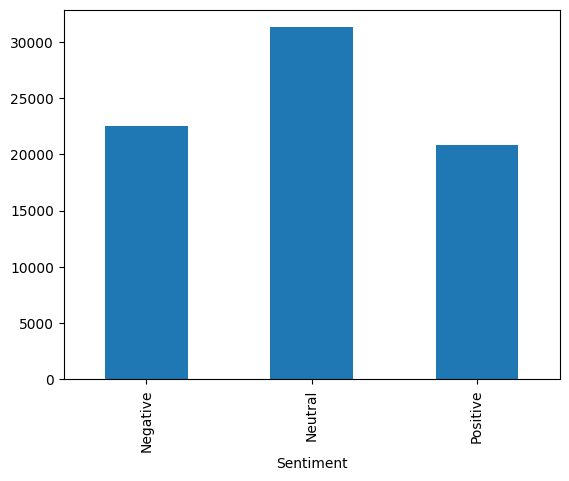

In [51]:
df.groupby('Sentiment')['Game'].count().plot.bar()

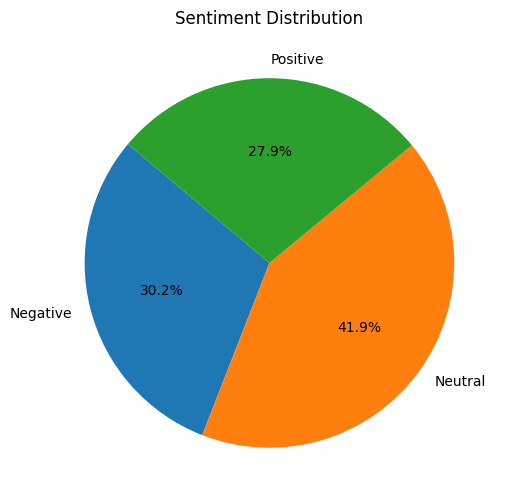

In [61]:
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.show()